In [2]:
require 'cutorch'
a = torch.Tensor(5,3)
a = torch.rand(5,3)
b = torch.rand(3, 7)
c = torch.mm(a,b)
print(c)
a = a:cuda()
b = b:cuda()
c = torch.mm(a,b)
print(c)

 1.7565  1.1512  1.1870  1.9658  1.0517  1.6323  1.2823
 1.2249  0.3645  0.9609  1.2186  0.4008  0.7496  0.6107
 0.8005  0.4974  0.7733  0.8365  0.7049  0.5434  0.9063
 1.6493  1.0770  1.2449  1.8157  1.1265  1.4276  1.3973
 0.5915  0.2259  0.6098  0.5699  0.4083  0.2795  0.5710
[torch.DoubleTensor of size 5x7]

 1.7565  1.1512  1.1870  1.9658  1.0517  1.6323  1.2823
 1.2249  0.3645  0.9609  1.2186  0.4008  0.7496  0.6107
 0.8005  0.4974  0.7733  0.8365  0.7049  0.5434  0.9063
 1.6493  1.0770  1.2449  1.8157  1.1265  1.4276  1.3973
 0.5915  0.2259  0.6098  0.5699  0.4083  0.2795  0.5710
[torch.CudaTensor of size 5x7]



In [1]:
require 'nn'

net = nn.Sequential()
net:add(nn.SpatialConvolution(1, 6, 5, 5)) -- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

print('Lenet6\n' .. net:__tostring());
input = torch.rand(1,32,32)
output = net:forward(input)
print(output)
net:zeroGradParameters()
gradInput = net:backward(input, torch.rand(10))
print(#gradInput)
criterion = nn.ClassNLLCriterion()
-- print(criterion(output, 3))
print(criterion)
print(criterion:forward(output,3))
print(criterion)
gradients = criterion:backward(output, 3)
print(gradients)
gradInput = net:backward(input, gradients)
print(#gradInput)
print("haha")
-- gradFirstFilters = net:backward()
-- parameters, gradParameters = net:getParameters()
-- print(gradParameters)

Lenet6
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(400)
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


-2.2463
-2.3196
-2.3143
-2.2761
-2.2415
-2.4224
-2.3566
-2.2068
-2.3704
-2.2912
[torch.DoubleTensor of size 10]



  1
 32
 32
[torch.LongStorage of size 3]



nn.ClassNLLCriterion
{
  sizeAverage : true
  output : 0
  gradInput : DoubleTensor - empty
  output_tensor : DoubleTensor - size: 1
  target : LongTensor - size: 1
  total_weight_tensor : DoubleTensor - size: 1
}
2.3143303937153	1	
nn.ClassNLLCriterion
{
  sizeAverage : true
  output : 2.3143303937153
  gradInput : DoubleTensor - empty
  output_tensor : DoubleTensor - size: 1
  target : LongTensor - size: 1
  total_weight_tensor : DoubleTensor - size: 1
}
 0
 0
-1
 0
 0
 0
 0
 0
 0
 0
[torch.DoubleTensor of size 10]



  1
 32
 32
[torch.LongStorage of size 3]

haha	


{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}
trainset.data	
 10000
     3
    32
    32
[torch.LongStorage of size 4]



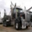

truck	


{
  1 : DoubleTensor - size: 3x32x32
  2 : 2
}


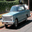

 0.2667
 0.8403
 0.3267
 0.6099
 0.1898
 0.9356
 0.4990
 0.1848
 0.6973
 0.1775
 0.1082
 0.5340
[torch.DoubleTensor of size 12]



 0.2667
 0.8403
 0.3267
 0.6099
[torch.DoubleTensor of size 4]

4	
nil	
 10000
     1
    32
    32
[torch.LongStorage of size 4]

 10000
     1
    32
    32
[torch.LongStorage of size 4]

 23
 23
 23
 23
 23
 23
 23
 23
 23
 23
[torch.LongStorage of size 10]

23	
function: builtin#3	
userdata	


Channel 1, Mean: 125.83175029297	


Channel 1, Standard Deviation: 63.143400842609	


userdata	


Channel 2, Mean: 123.26066621094	


Channel 2, Standard Deviation: 62.369209019002	


userdata	


Channel 3, Mean: 114.03068681641	


Channel 3, Standard Deviation: 66.965808411114	


net:	


nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(3 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(400)
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


nn.StochasticGradient	
# StochasticGradient: training	


# current error = 2.1984502631426	


# current error = 1.9040097042203	


# current error = 1.6878823676705	


# current error = 1.5613469815493	


# current error = 1.4684165760517	


# current error = 1.3907891205788	


# current error = 1.3225472400546	


# current error = 1.2557284077048	


# current error = 1.1896358840466	


# current error = 1.123701040113	


# current error = 1.054728722477	


# current error = 0.98362266236544	


# current error = 0.9095384850502	


# current error = 0.83410198845863	


# current error = 0.76195524773598	


# current error = 0.69149321086407	


# current error = 0.6328809669733	


# current error = 0.58133755397797	


# current error = 0.53232165280581	


# current error = 0.50910288524628	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 0.50910288524628	


In [7]:

require 'paths'
require 'nn'
if (not paths.filep("cifar10torchsmall.zip")) then
    os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
    os.execute('unzip cifar10torchsmall.zip')
end
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}
print(trainset)
print("trainset.data")
-- print(trainset.data)
print(#trainset.data)
imageId = 1234
itorch.image(trainset.data[imageId]) -- display the 100-th image in dataset
print(classes[trainset.label[imageId]])

setmetatable(trainset, 
    {__index = function(t, i) 
--                     if type(i) == 'number'
--                     then
                        return {t.data[i], t.label[i]} 
--                     else
--                         return {t.data[0], t.label[0]}
--                     end
                    
                end}
);
trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

print(trainset[33]) -- load sample number 33.
itorch.image(trainset[33][1])
ttt = torch.rand(12)
print(ttt)
print(ttt[{{1,4}}])
l = {'3143412', 312432421, '343dsfa', 34455}
print(#l)
print(l[{1}])
-- print("trainset.data:")
-- print(trainset.data)
redChannel = trainset.data[{ {}, {1}, {}, {}  }] -- this picks {all images, 1st channel, all vertical pixels, all horizontal pixels}
print(#redChannel)
info_red = #redChannel
print(info_red)
ts = torch.LongStorage(10):fill(23)
print(ts)
print(ts[3])
print(type)
mean = {} -- store the mean, to normalize the test set in the future
stdv  = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    print(type(trainset.data[{{}, {i}, {}, {}}]))
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end


net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems
criterion = nn.ClassNLLCriterion()
print("net:")
print(net:__tostring())
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.
-- trainer:train(trainset)
require 'cunn'
net = net:cuda()
criterion = criterion:cuda()
trainset.data = trainset.data:cuda()
trainset.label = trainset.label:cuda()

trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 20 -- just do 5 epochs of training.

print(trainer:__tostring())
trainer:train(trainset)